In [166]:
# For analysis and numerical functions 
import pandas as pd 
import numpy as np 

# For Vizualization 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
import pickle
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [167]:
df=pd.read_csv('/Users/nishu/Udupi_Mallige_Pricing_Report_22072024112559.csv')

In [168]:
df.head()

,Date,Mallige,Jaaji
0,2018-10-02,170,0
1,2018-10-01,210,0
2,2018-10-03,310,0
3,2018-10-04,290,0
4,2018-10-07,660,0


In [169]:
df.tail(5)

,Date,Mallige,Jaaji
2094,2024-07-17,430,260
2095,2024-07-18,430,380
2096,2024-07-19,470,300
2097,2024-07-20,470,380
2098,2024-07-21,430,300


In [170]:
df=df.drop('Jaaji',axis=1)

In [171]:
df.head()

,Date,Mallige
0,2018-10-02,170
1,2018-10-01,210
2,2018-10-03,310
3,2018-10-04,290
4,2018-10-07,660


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     2099 non-null   object
 1   Mallige  2099 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 32.9+ KB


In [173]:
df['Date'] = pd.to_datetime(df['Date'])

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099 entries, 0 to 2098
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2099 non-null   datetime64[ns]
 1   Mallige  2099 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 32.9 KB


In [175]:
# df.index=df['Date']
# del df['Date']

In [176]:
df.head()

,Date,Mallige
0,2018-10-02,170
1,2018-10-01,210
2,2018-10-03,310
3,2018-10-04,290
4,2018-10-07,660


In [177]:
df=df.rename(columns={'Mallige':'Price'})

In [178]:
df.head(5)

,Date,Price
0,2018-10-02,170
1,2018-10-01,210
2,2018-10-03,310
3,2018-10-04,290
4,2018-10-07,660


In [179]:
df.tail(5)

,Date,Price
2094,2024-07-17,430
2095,2024-07-18,430
2096,2024-07-19,470
2097,2024-07-20,470
2098,2024-07-21,430


In [180]:
df.columns

Index(['Date', 'Price'], dtype='object')

In [181]:
df.describe()

,Date,Price
count,2099,2099.000000
mean,2021-08-31 20:22:31.500714752,647.131968
min,2018-10-01 00:00:00,50.000000
25%,2020-03-10 12:00:00,300.000000
50%,2021-09-06 00:00:00,530.000000
75%,2023-02-12 12:00:00,950.000000
max,2024-07-21 00:00:00,2100.000000
std,NaN,448.309043


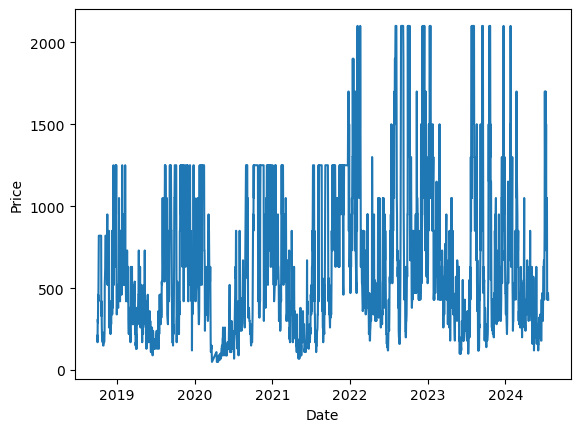

In [182]:
sns.lineplot(x="Date", y="Price", data=df) 
plt.show()

In [183]:
df['Date']

0      2018-10-02
1      2018-10-01
2      2018-10-03
3      2018-10-04
4      2018-10-07
          ...    
2094   2024-07-17
2095   2024-07-18
2096   2024-07-19
2097   2024-07-20
2098   2024-07-21
Name: Date, Length: 2099, dtype: datetime64[ns]

In [184]:
df_2023=df[df['Date'].dt.year == 2023]

In [185]:
df_2023

,Date,Price
1531,2023-01-01,530
1532,2023-01-02,550
1533,2023-01-03,670
1534,2023-01-04,1300
1535,2023-01-05,850
...,...,...
1891,2023-12-27,950
1892,2023-12-28,1300
1893,2023-12-29,1300
1894,2023-12-30,850


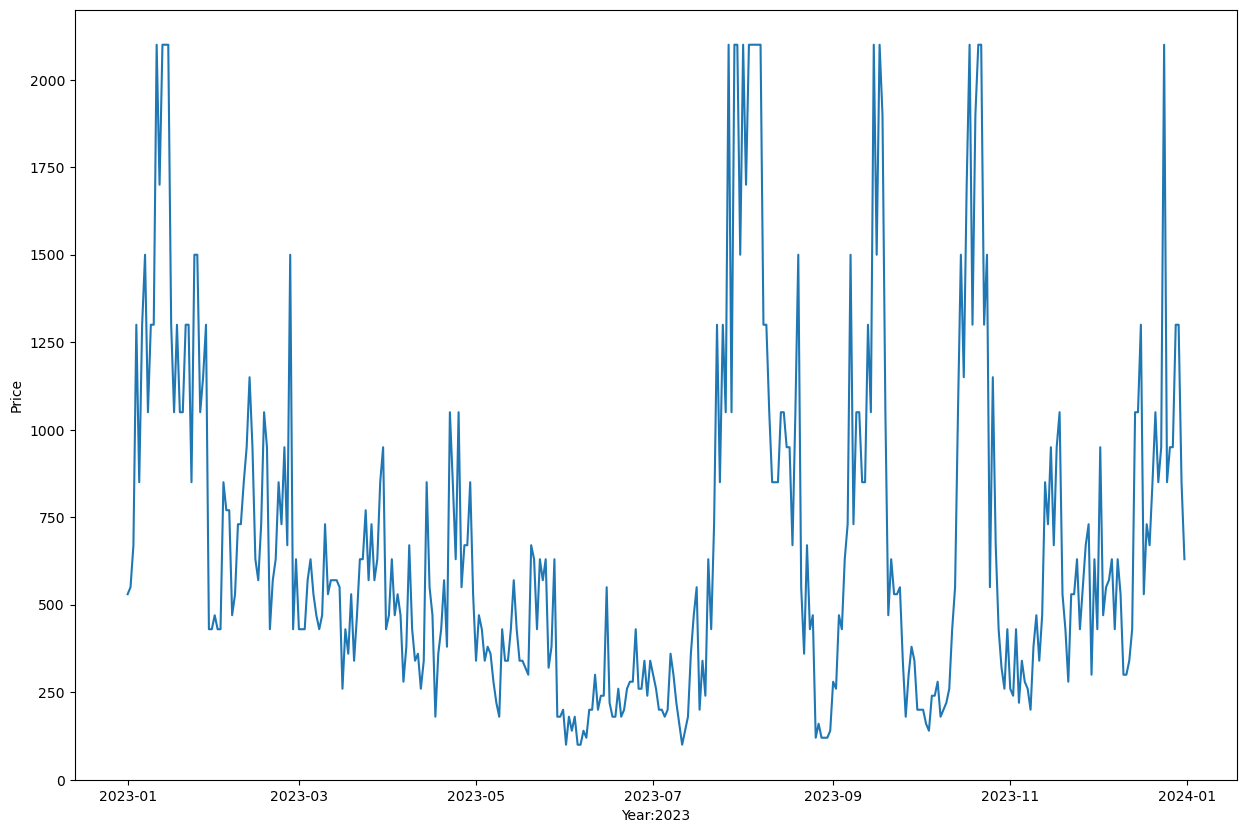

In [186]:
plt.figure(figsize=(15,10))

sns.lineplot(x="Date", y="Price", data=df_2023) 
plt.xlabel('Year:2023')
plt.ylabel('Price')
plt.show()



In [187]:
df['Date'] = pd.to_datetime(df['Date'])
df['year']=df['Date'].dt.year
df.head()

,Date,Price,year
0,2018-10-02,170,2018
1,2018-10-01,210,2018
2,2018-10-03,310,2018
3,2018-10-04,290,2018
4,2018-10-07,660,2018


In [188]:
df.index=df['Date']
del df['Date']

In [189]:
df

,Price,year
Date,,
2018-10-02,170,2018
2018-10-01,210,2018
2018-10-03,310,2018
2018-10-04,290,2018
2018-10-07,660,2018
...,...,...
2024-07-17,430,2024
2024-07-18,430,2024
2024-07-19,470,2024


In [190]:
df_2021=df.query('year == 2021')

In [191]:
df_2021

,Price,year
Date,,
2021-01-01,950,2021
2021-01-02,1250,2021
2021-01-03,630,2021
2021-01-04,730,2021
2021-01-05,730,2021
...,...,...
2021-12-27,850,2021
2021-12-28,1500,2021
2021-12-29,630,2021


In [192]:
df_2022=df.query('year == 2022')

In [193]:
df_2022

,Price,year
Date,,
2022-01-01,850,2022
2022-01-02,670,2022
2022-01-03,470,2022
2022-01-04,530,2022
2022-01-05,850,2022
...,...,...
2022-12-27,570,2022
2022-12-28,730,2022
2022-12-29,670,2022


In [194]:
df_2023=df.query('year == 2023')

In [195]:
df_2023

,Price,year
Date,,
2023-01-01,530,2023
2023-01-02,550,2023
2023-01-03,670,2023
2023-01-04,1300,2023
2023-01-05,850,2023
...,...,...
2023-12-27,950,2023
2023-12-28,1300,2023
2023-12-29,1300,2023


In [196]:
df_2024=df.query('year == 2024')

In [197]:
df_2024

,Price,year
Date,,
2024-01-01,470,2024
2024-01-02,470,2024
2024-01-03,430,2024
2024-01-04,340,2024
2024-01-05,530,2024
...,...,...
2024-07-17,430,2024
2024-07-18,430,2024
2024-07-19,470,2024


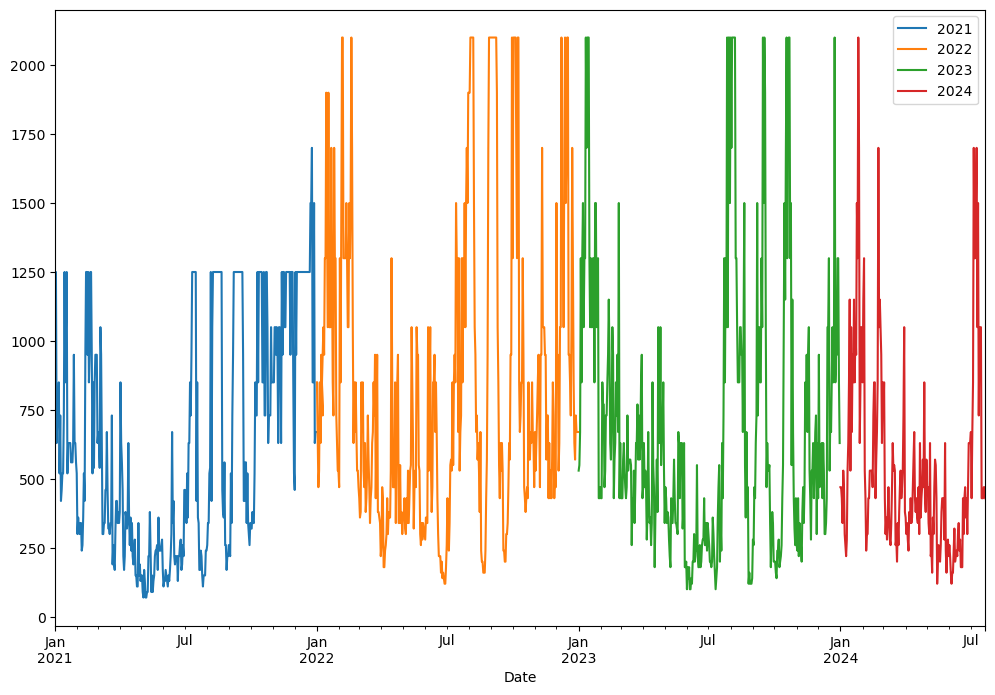

In [198]:
plt.figure(figsize=(12, 8))
df_2021.Price.plot()
df_2022.Price.plot()
df_2023.Price.plot()
df_2024.Price.plot()
plt.legend(['2021','2022','2023','2024'])
plt.show()

In [199]:
df=df.drop('year',axis=1)

In [200]:
##Moving Average

# Assuming df is already defined with the 'Price' column
optimal_n = None
best_mse = None

# Extract 'Price' column as a numpy array of type float32
db = df[['Price']].values.astype('float32')

# Prepare an array to store MSE results for each window size n
mean_results_for_all_possible_n_values = np.zeros(int(len(db)/2 - 2))

# Iterate over possible window sizes n, starting from 3 to len(db)/2
for n in range(3, int(len(db)/2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    
    # Calculate the MSE for each position i
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i + n]) - db[i + n][0], 2)
    
    # Store the average MSE for the current n
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)

# Get the optimal n and the best MSE
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3  # Add 3 since n starts from 3
best_mse = np.min(mean_results_for_all_possible_n_values)

# Output results
print("Mean Squared Errors for all n values:", mean_results_for_all_possible_n_values)
print("Best MSE:", best_mse)
print("Optimal n (window size):", optimal_n)

Mean Squared Errors for all n values: [ 68418.10893717  74810.7398568   82260.82330468 ... 267887.62083718
 268034.24923306 268185.74236124]
Best MSE: 68418.10893717236
Optimal n (window size): 3


In [201]:
##forecast the t+1 observation
print("MA =",np.mean(db[:, 0][len(db)-optimal_n:len(db)]))

MA = 456.66666


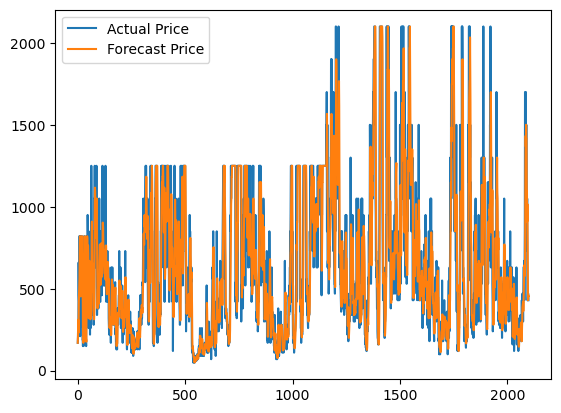

In [202]:
forecast=np.zeros(len(db)+1)
for i in range(0,optimal_n):
    forecast[i]=db[i][0]
for i in range(0,len(db)-optimal_n+1):
    forecast[i+optimal_n]=np.mean(db[:,0][i:i+optimal_n])
plt.plot(db[:, 0],label= 'Actual Price')
plt.plot(forecast,label="Forecast Price")
plt.legend()
plt.show()

Components of time series
1) cyclic component 2)Seasonal component 3) trend which changes with time and does not repeat itself and it describes the direction in which the series is going

<h2>Plot rolling Average<h2> <br>
Which means, for each time point, you take the average of the points on either side of it


In [203]:

p=df[['Price']]

Text(0.5, 0, 'Year')

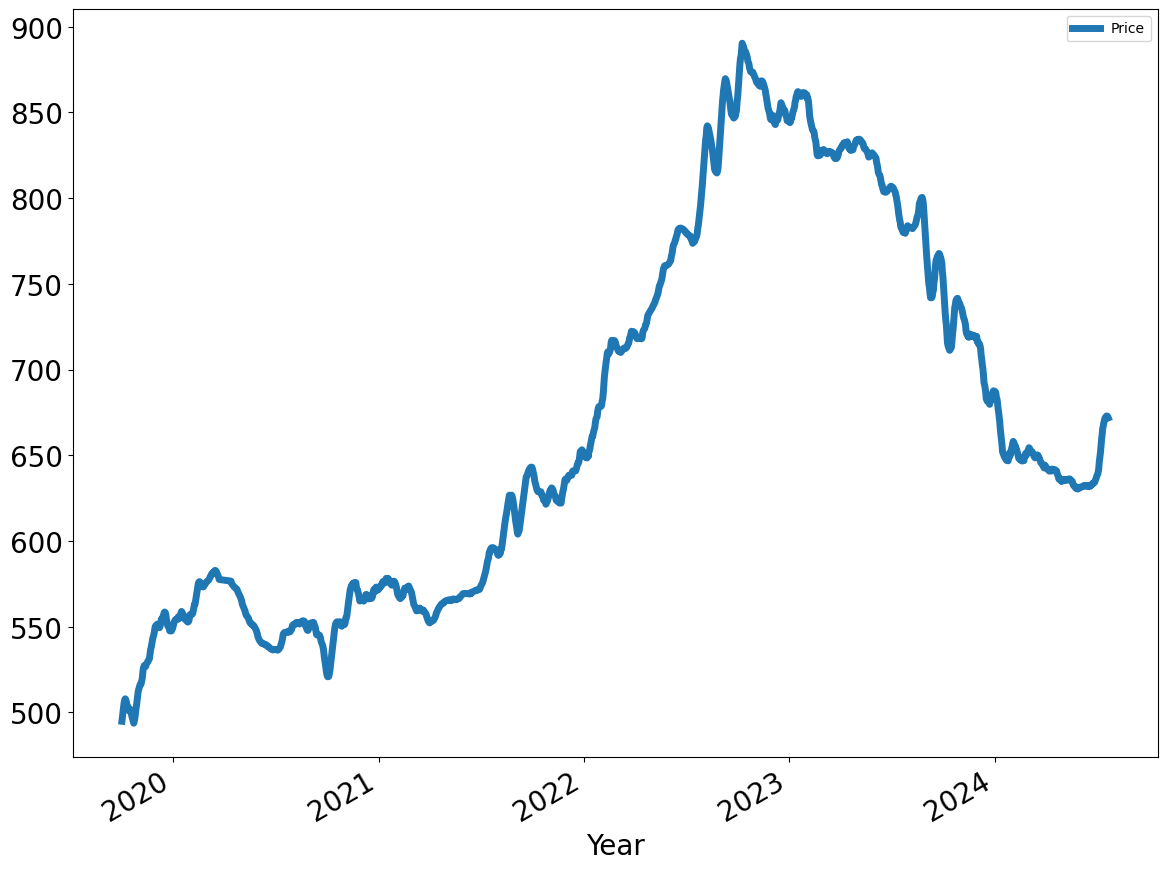

In [204]:
p.rolling(365).mean().plot(figsize=(14,11),linewidth=5,fontsize=20)
plt.xlabel('Year',fontsize=20)

<h4>Seasonal effect</h4>

In [205]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [206]:


result = seasonal_decompose(df, model='additive',period=365)


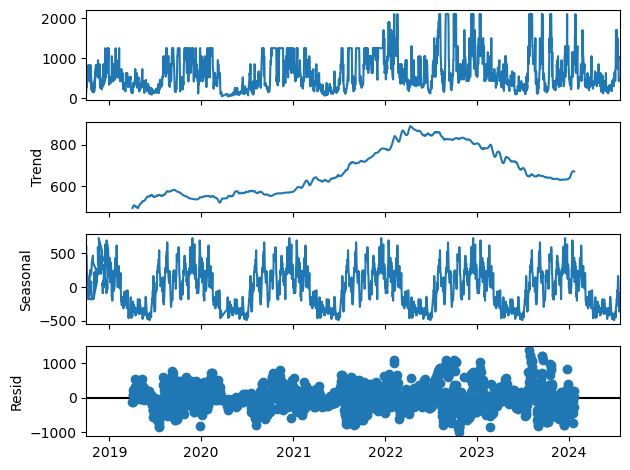

In [207]:
result.plot()
plt.show()

<h3>Test for Stationarity</h3>
*constant mean<br>
*constant variance<br>
*auto co-variance that does not depend on time


<h3>ADF test: if p>0.05, it is non-stationary</h3>

In [208]:
from statsmodels.tsa.stattools import adfuller
from pandas import Series

In [209]:
data=df
x=data.values
result=adfuller(x)
print('ADF Statistic',result[0])
print('p value',result[1])
print('Critical values')
for key, value in result[4].items():
    print(key,value)

ADF Statistic -4.140763158369108
p value 0.000828702379502031
Critical values
1% -3.4335099516667325
5% -2.8629359231480236
10% -2.5675131253354153


Since p-value is <0.05 and ADF statisic is negative, we can reject the null hypothesis at most negative 1 percent significance level i.e. the data is stationary and is well suited  time series models that assume stationarity, like ARIMA.

<h3> we can make data sationary by applying log or First order differencing or log based differencing or Linear regression detrending</h3>

<h3>Time series forecasting</h3>
ARIMA


In [210]:
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df.index.freq = pd.infer_freq(df.index)  # Automatically infer frequency
df.sort_index(inplace=True)

In [211]:
from pmdarima import auto_arima

In [212]:
# ##Automatic parmeter selection for ARIMA
# stepwise_model=auto_arima(df,start_p=1,starr_q=1,
#                           max_p=3,max_q=4,m=365,
#                           start_P=0,seasonal=True,
#                         d=1,D=1,trace=True,
#                         error_action='ignore',
#                         suppress_warnings=True,
#                         stepwise=False)
# ##Account for seasonality : SARIMA

In [213]:
from statsmodels.tsa.arima.model import ARIMA

In [214]:
model=ARIMA(df['Price'],order=(7,1,0))
#set lag value  as 5 for autoregression
#uses a difference order of 1 
#moving avg model of 0
model_fit=model.fit()
print(model_fit.summary())

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2099
Model:                 ARIMA(7, 1, 0)   Log Likelihood              -14488.500
Date:                Sun, 22 Sep 2024   AIC                          28993.000
Time:                        17:44:53   BIC                          29038.190
Sample:                             0   HQIC                         29009.553
                               - 2099                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3396      0.016    -21.554      0.000      -0.370      -0.309
ar.L2         -0.1024      0.017     -5.946      0.000      -0.136      -0.069
ar.L3         -0.0630      0.020     -3.130      0.0

<h3>Identifying important variables(lags)</h3>

In [215]:
#remove seasonal difference
differenced=df.diff(356)

In [216]:
differenced.head(16)

,Price
Date,
2018-10-01,NaN
2018-10-02,NaN
2018-10-03,NaN
2018-10-04,NaN
2018-10-05,NaN
2018-10-06,NaN
2018-10-07,NaN
2018-10-08,NaN
2018-10-09,NaN


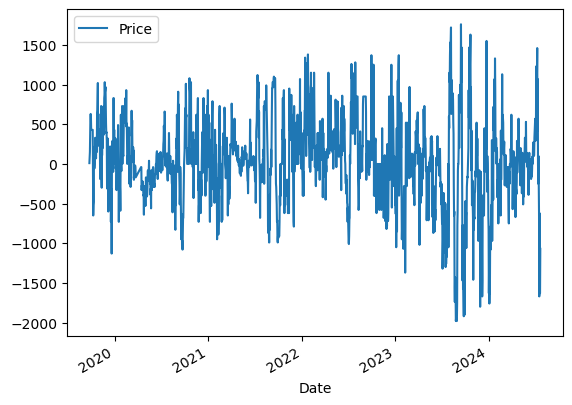

In [217]:
differenced.plot()
plt.show()

<h3>Prophetic Time series</h3>

In [218]:
from prophet import Prophet  # If you have the updated version


In [219]:
df.shape

(2099, 1)

In [220]:
# Define the size of the test set (e.g., last 30 days)
test_size = 60

In [221]:
# Split the data
train = df[:-test_size]
test = df[-test_size:]

# Display the sizes
print(f'Train size: {len(train)}')
print(f'Test size: {len(test)}')

Train size: 2039
Test size: 60


In [222]:
df.head(5)

,Price
Date,
2018-10-01,210
2018-10-02,170
2018-10-03,310
2018-10-04,290
2018-10-05,460


In [223]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_condition = (df['Price'] < (Q1 - 1.5 * IQR)) | (df['Price'] > (Q3 + 1.5 * IQR))
outliers = df[outlier_condition]

In [224]:
df = df[~outlier_condition]

In [225]:
x=pd.DataFrame(index=range(0,len(df)))
x['ds']=df.index
x['y']=df['Price'].values
x.head()

,ds,y
0,2018-10-01,210
1,2018-10-02,170
2,2018-10-03,310
3,2018-10-04,290
4,2018-10-05,460


17:44:54 - cmdstanpy - INFO - Chain [1] start processing
17:44:54 - cmdstanpy - INFO - Chain [1] done processing
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


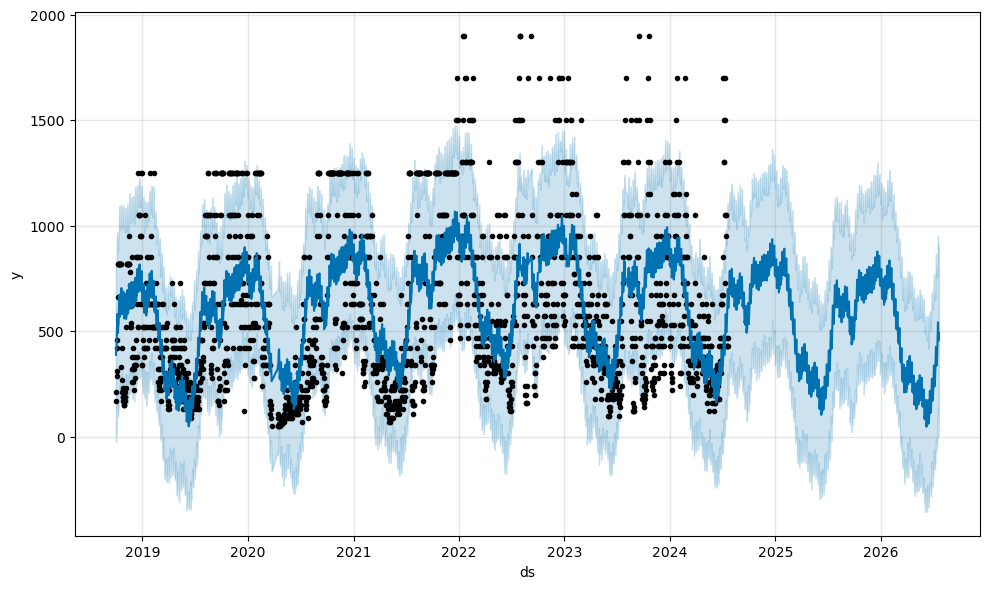

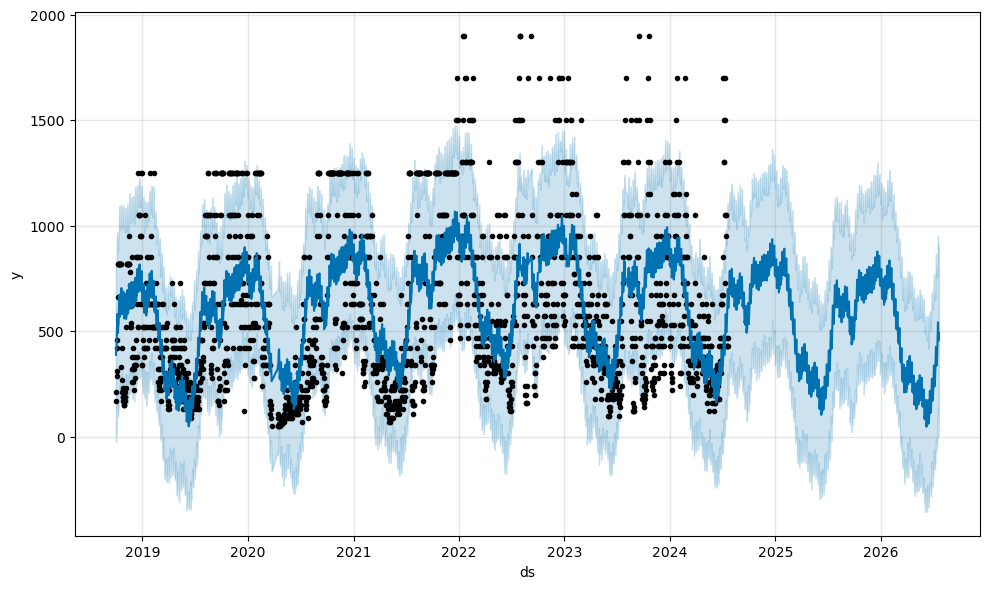

In [226]:
m=Prophet(yearly_seasonality=True)
m.fit(x)
# Create a DataFrame for future dates
future = m.make_future_dataframe(periods=730)  # Forecast for the next year
  

# Make predictions
forecast = m.predict(future)

# View the forecast
m.plot(forecast)

In [227]:
from sklearn.model_selection import cross_val_score
import time
from sklearn.model_selection import TimeSeriesSplit

In [228]:
x.head()

,ds,y
0,2018-10-01,210
1,2018-10-02,170
2,2018-10-03,310
3,2018-10-04,290
4,2018-10-05,460


In [229]:
train_x=x.loc[lambda val:val['ds'].dt.year<2023, :]
test_x=x.loc[lambda val:val['ds'].dt.year==2023, :]

In [230]:
train_x.head()

,ds,y
0,2018-10-01,210
1,2018-10-02,170
2,2018-10-03,310
3,2018-10-04,290
4,2018-10-05,460


In [231]:
train_x.tail()

,ds,y
1496,2022-12-27,570
1497,2022-12-28,730
1498,2022-12-29,670
1499,2022-12-30,670
1500,2022-12-31,670


In [232]:
test_x.head(5)

,ds,y
1501,2023-01-01,530
1502,2023-01-02,550
1503,2023-01-03,670
1504,2023-01-04,1300
1505,2023-01-05,850


In [233]:
from prophet.diagnostics import cross_validation,performance_metrics

In [234]:
prophet_model=Prophet(changepoint_prior_scale=0.05)
prophet_model.fit(train_x)
##evaluate model perfomance
prophet_cv_df=cross_validation(prophet_model,horizon=365,period=180)

17:44:55 - cmdstanpy - INFO - Chain [1] start processing
17:44:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/1137 [00:00<?, ?it/s]

17:44:56 - cmdstanpy - INFO - Chain [1] start processing
17:44:56 - cmdstanpy - INFO - Chain [1] done processing
17:44:56 - cmdstanpy - INFO - Chain [1] start processing
17:44:56 - cmdstanpy - INFO - Chain [1] done processing
17:44:56 - cmdstanpy - INFO - Chain [1] start processing
17:44:56 - cmdstanpy - INFO - Chain [1] done processing
17:44:56 - cmdstanpy - INFO - Chain [1] start processing
17:44:56 - cmdstanpy - INFO - Chain [1] done processing
17:44:56 - cmdstanpy - INFO - Chain [1] start processing
17:44:56 - cmdstanpy - INFO - Chain [1] done processing
17:44:56 - cmdstanpy - INFO - Chain [1] start processing
17:44:56 - cmdstanpy - INFO - Chain [1] done processing
17:44:56 - cmdstanpy - INFO - Chain [1] start processing
17:44:56 - cmdstanpy - INFO - Chain [1] done processing
17:44:56 - cmdstanpy - INFO - Chain [1] start processing
17:44:56 - cmdstanpy - INFO - Chain [1] done processing
17:44:56 - cmdstanpy - INFO - Chain [1] start processing
17:44:56 - cmdstanpy - INFO - Chain [1]

In [235]:
prophet_cv_df.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
1132,2022-12-27,1034.442243,634.047409,1413.849901,570,2022-12-26 23:59:59.999999635
1133,2022-12-28,997.464532,599.430446,1369.760687,730,2022-12-27 23:59:59.999999635
1134,2022-12-29,1016.751532,616.125804,1421.777939,670,2022-12-28 23:59:59.999999635
1135,2022-12-30,1067.104029,654.484886,1448.542453,670,2022-12-29 23:59:59.999999635
1136,2022-12-31,1049.519362,663.462824,1446.279317,670,2022-12-30 23:59:59.999999635


In [236]:
prophet_perf_df=performance_metrics(prophet_cv_df)

In [237]:
prophet_perf_df.head(5)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 00:00:00.000000365,118046.778456,343.579363,277.482698,0.676438,0.381486,0.465464,0.656113


<h4>Predict for future</h4>

/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',
/opt/anaconda3/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call 

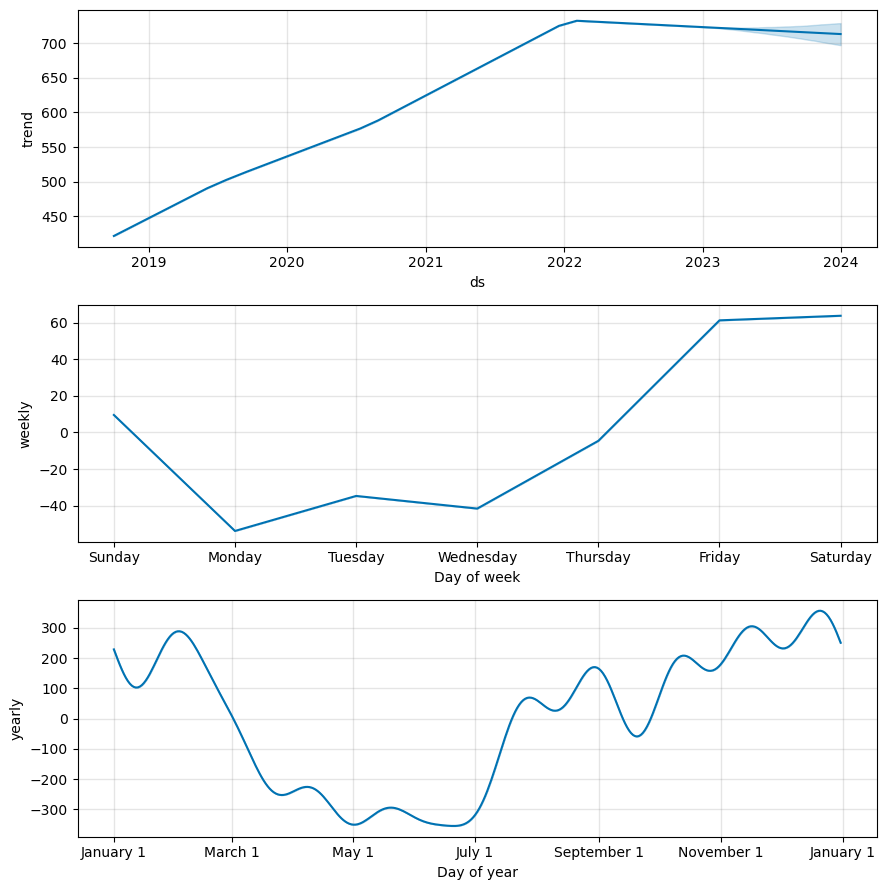

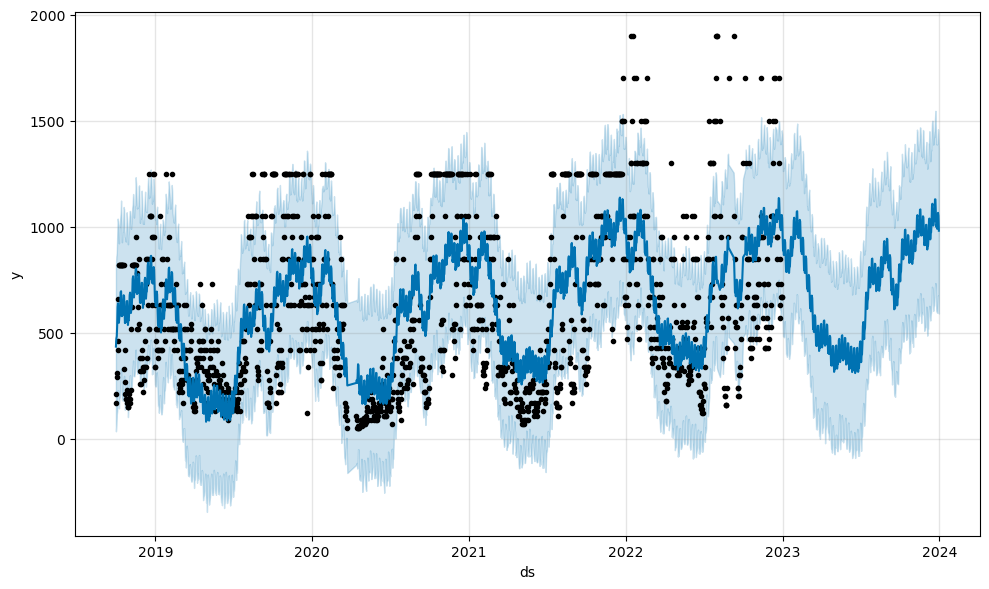

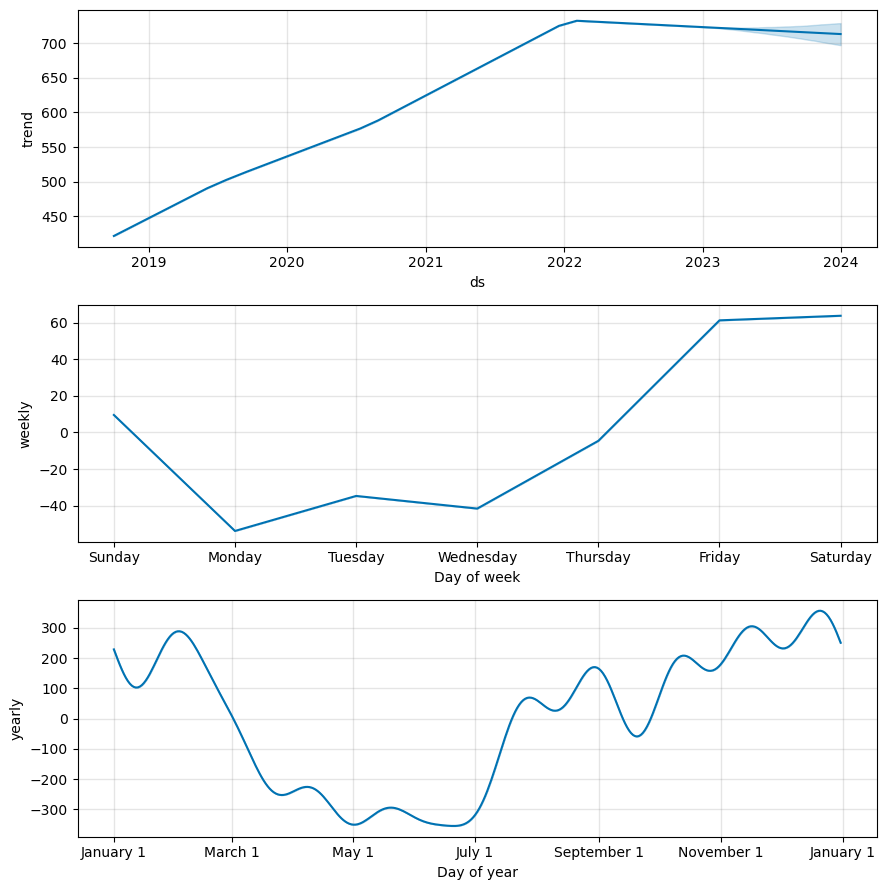

In [238]:
future_prophet_df=prophet_model.make_future_dataframe(periods=365)
predicted_prophet_df=prophet_model.predict(future_prophet_df)
prophet_model.plot(predicted_prophet_df)
prophet_model.plot_components(predicted_prophet_df)